In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.head(10))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1      

In [4]:
print(train.shape)

(42000, 785)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('label', axis=1), train['label'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [6]:
X_train.iloc[0, :].value_counts()

34941
0      652
254     22
9        3
15       3
253      3
      ... 
250      1
181      1
85       1
135      1
82       1
Name: count, Length: 87, dtype: int64

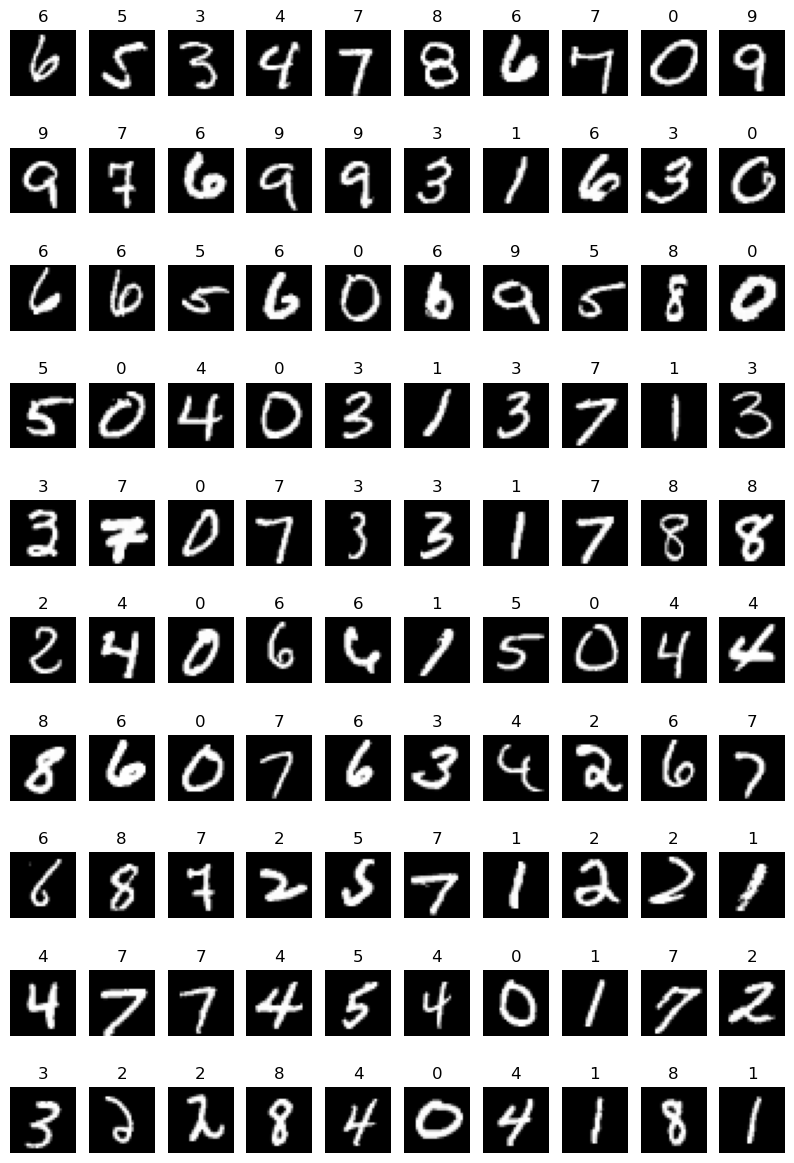

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def print_digit(train, test):
    plt.figure(figsize=(10, 15))
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        plt.title(test.iloc[i])
        plt.axis('off')
        plt.imshow(np.array(train.iloc[i, :]).reshape(28, 28), cmap='gray')
print_digit(X_train, y_train)

# preprocess

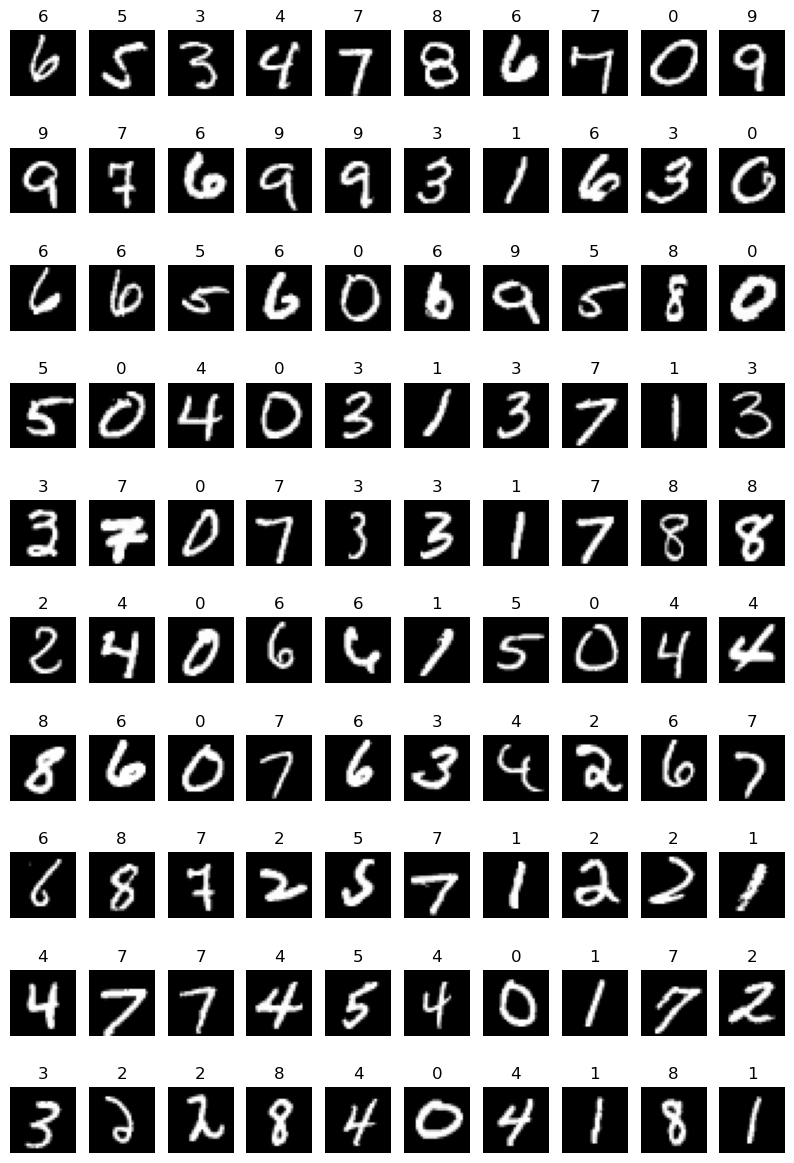

In [8]:
X_train = ((X_train / 255) - 0.5) * 2
X_test = ((X_test / 255) - 0.5) * 2
print_digit(X_train, y_train)

# model

In [19]:
!pip install tensorflow

In [9]:
from tensorflow.keras import Sequential, models, layers

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dense(128, activation='relu'))
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,256 (938.50 KB)

 Trainable params: 240,256 (938.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import tensorflow as tf

In [12]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7377 - loss: 1.2021 - val_accuracy: 0.8723 - val_loss: 0.6170
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8845 - loss: 0.5515 - val_accuracy: 0.8773 - val_loss: 0.5899
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8902 - loss: 0.5340 - val_accuracy: 0.8760 - val_loss: 0.5957
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8922 - loss: 0.5109 - val_accuracy: 0.8783 - val_loss: 0.5861
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8911 - loss: 0.5212 - val_accuracy: 0.8783 - val_loss: 0.5818
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9097 - loss: 0.4320 - val_accuracy: 0.9856 - val_loss: 0.0502
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9952 - loss: 0.0154 - val_accuracy: 0.9874 - val_loss: 0.0454
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9978 - lo

NameError: name 'test_images' is not defined

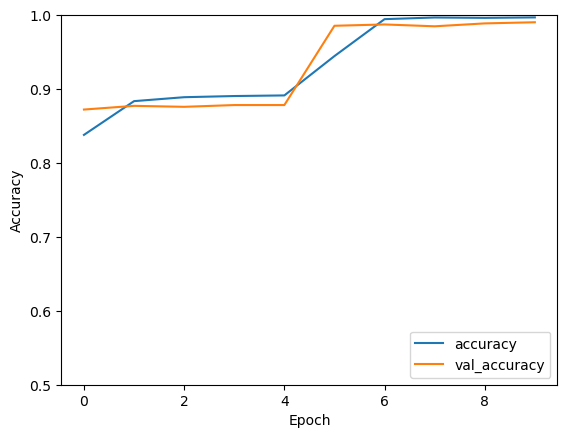

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [14]:
test = ((test / 255) - 0.5) * 2
test = test.values.reshape(-1, 28, 28, 1)

test_predictions = model.predict(test)
test_predictions = np.argmax(test_predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [33]:
submission = pd.DataFrame({'ImageId': range(1, len(test_predictions) + 1), 'Label': test_predictions})

submission.to_csv('submission.csv', index=False)

print("Submission file created successfully")

Submission file created successfully


In [87]:
import numpy as np
from PIL import Image
import os

X = []
y = []
file_list = os.listdir('data')
file_list = [f for f in file_list if f != '.DS_Store']
photoNum = len(file_list)
for i in file_list:
    img = Image.open(f'data/{i}')
    X.append(np.array(img))
    y.append(i[0])
    x = np.array(img)
    print(x.shape)


(381, 329, 3)
(316, 244, 3)
(493, 329, 3)
(356, 303, 3)


In [20]:
import cv2

In [88]:
pc_img = []
for i in range(photoNum):
    pc_img.append(cv2.resize(X[i], (28, 28)))

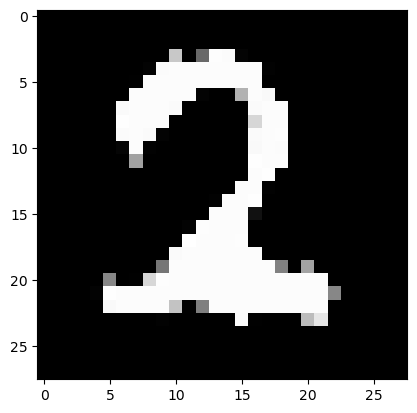

In [89]:
for i in range(photoNum):
    pc_img[i] = pc_img[i][:, :, 0]
    plt.imshow(pc_img[i], cmap='gray')

In [90]:
for i in range(photoNum):
    pc_img[i] = ((pc_img[i] / 255) - 0.5) * 2

In [91]:
pc_img = np.array(pc_img)
pc_img = pc_img.reshape(-1, 28, 28, 1)
print(pc_img.shape)

(4, 28, 28, 1)


In [93]:
test_predictions = model.predict(pc_img)
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)
print(y)
print('정확도: ', (sum(test_predictions.astype(str) == y) / len(y)) * 100, '%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[7 1 7 2]
['1', '1', '7', '2']
정확도:  75.0 %
